In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
bs = 64

In [4]:
path = untar_data(URLs.PETS); path

PosixPath('/home/fourmobro/.fastai/data/oxford-iiit-pet')

In [5]:
path_anno = path/'annotations'
path_img = path/'images'

In [6]:
fnames = get_image_files(path_img)

In [7]:
np.random.seed(265)
pat = r'/([^/]+)_\d+.jpg$'

In [8]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=320, bs=bs)
data.normalize(imagenet_stats)

In [9]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)
learn.model = torch.nn.DataParallel(learn.model, device_ids=[0, 1])

In [10]:
learn.fit_one_cycle(10, max_lr=slice(1e-3))

Total time: 06:14
epoch  train_loss  valid_loss  error_rate
1      1.647479    0.458432    0.102791    (00:49)
2      0.623195    0.225183    0.059224    (00:35)
3      0.376385    0.201272    0.062628    (00:35)
4      0.278588    0.183651    0.061266    (00:36)
5      0.212412    0.172773    0.055140    (00:36)
6      0.185010    0.165066    0.046290    (00:35)
7      0.150884    0.159770    0.051055    (00:36)
8      0.119487    0.149946    0.047651    (00:36)
9      0.104675    0.146712    0.043567    (00:36)
10     0.092395    0.148046    0.043567    (00:36)



In [11]:
learn.save('stage-1-r50-265-F')

In [13]:
learn.load('stage-1-r50-265-F')

In [14]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


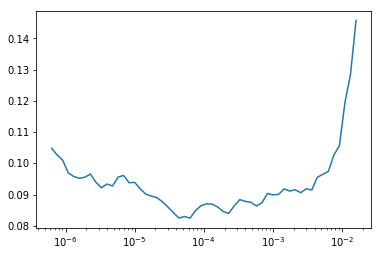

In [15]:
learn.recorder.plot()

In [16]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(10e-5, 5e-5))

Total time: 07:24
epoch  train_loss  valid_loss  error_rate
1      0.106976    0.151370    0.041525    (00:47)
2      0.105357    0.156083    0.047651    (00:43)
3      0.137932    0.208405    0.063308    (00:43)
4      0.121422    0.173731    0.053778    (00:44)
5      0.096399    0.181910    0.052417    (00:43)
6      0.070560    0.160673    0.049694    (00:44)
7      0.050019    0.139012    0.039483    (00:44)
8      0.037280    0.149983    0.043567    (00:44)
9      0.025762    0.129968    0.036760    (00:44)
10     0.026167    0.131423    0.036760    (00:44)



In [17]:
learn.save('stage-2-r50-265-F')
learn.load('stage-2-r50-265-F')

In [18]:
learn.validate()

[0.13142301, 0.03675970295158838]